In [1]:
import pandas as pd

# تحميل الملف
file_path = "C:/Users/asus/Desktop/تدريب/General_Education_School.csv"
df = pd.read_csv(file_path)

# عرض أول 5 صفوف
df.head()


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DBN                                1671 non-null   object
 1   School Name                        1671 non-null   object
 2   School Type                        1670 non-null   object
 3   Parent Response Rate               1671 non-null   object
 4   Teacher Response Rate              1671 non-null   object
 5   Student Response Rate              996 non-null    object
 6   Total Safety and Respect Score     1671 non-null   object
 7   Total Communication Score          1671 non-null   object
 8   Total Engagement Score             1671 non-null   object
 9   Total Academic Expectations Score  1671 non-null   object
dtypes: object(10)
memory usage: 130.7+ KB


In [3]:
df["School Name"].describe()


count         1671
unique        1666
top       P.S. 212
freq             2
Name: School Name, dtype: object

In [4]:
df["School Type"].unique()

array([nan, 'Elementary School', 'Elementary/Middle School',
       'Middle/High School', 'Middle School', 'High School',
       'Transfer High School', 'Elementary/Middle/High School',
       'Early Childhood School', 'YABC'], dtype=object)

In [5]:
invalid_entries = ["rr_p", "rr_t", "rr_s"]

# حذف الصفوف اللي تحتوي على أي من القيم هاي في الأعمدة الثلاثة
df_cleaned = df[
    ~df["Parent Response Rate"].isin(invalid_entries) &
    ~df["Teacher Response Rate"].isin(invalid_entries) &
    ~df["Student Response Rate"].isin(invalid_entries)
].copy()

# التأكد من عدد الصفوف بعد التنظيف
print("عدد الصفوف بعد التنظيف:", df_cleaned.shape[0])

# عرض أول 5 صفوف بعد التنظيف
df_cleaned.head()

عدد الصفوف بعد التنظيف: 1670


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7
5,01M063,P.S. 063 William Mckinley,Elementary School,58%,100%,NaN,8.5,7.4,7.6,7.8


In [6]:
percentage_columns = [
    'Parent Response Rate',
    'Teacher Response Rate',
    'Student Response Rate'
]

for col in percentage_columns:
    df_cleaned[col] = df_cleaned[col].str.replace('%', '').astype(float) / 100


In [7]:
score_columns = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

for col in score_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


In [8]:
# حذف العمود
df_cleaned.drop(columns=["DBN"], inplace=True)

# التأكد من الأعمدة المتبقية
df_cleaned.columns

Index(['School Name', 'School Type', 'Parent Response Rate',
       'Teacher Response Rate', 'Student Response Rate',
       'Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score'],
      dtype='object')

In [9]:
df_cleaned.isna().sum()

School Name                            0
School Type                            0
Parent Response Rate                   0
Teacher Response Rate                  0
Student Response Rate                675
Total Safety and Respect Score         0
Total Communication Score              0
Total Engagement Score                 0
Total Academic Expectations Score      0
dtype: int64

In [10]:
df_cleaned[df_cleaned["Student Response Rate"].isna()]


,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
1,P.S. 015 Roberto Clemente,Elementary School,0.61,0.92,NaN,8.4,8.2,8.3,8.2
2,P.S. 019 Asher Levy,Elementary School,0.92,0.94,NaN,8.4,8.0,8.0,8.2
3,P.S. 020 Anna Silver,Elementary School,0.88,0.73,NaN,8.5,7.8,8.2,8.2
5,P.S. 063 William Mckinley,Elementary School,0.58,1.00,NaN,8.5,7.4,7.6,7.8
6,P.S. 064 Robert Simon,Elementary School,0.50,0.94,NaN,8.6,7.9,8.1,8.2
...,...,...,...,...,...,...,...,...,...
1660,New York City Montessori Charter School,Early Childhood School,0.54,1.00,NaN,8.0,7.9,7.9,8.1
1666,Bronx Charter School For Better Learning,Elementary School,0.67,0.89,NaN,8.7,8.1,8.0,8.2
1667,Bronx Charter School For The Arts,Elementary School,0.73,0.82,NaN,8.1,7.3,7.6,7.6
1669,Harlem Success Academy Charter School 5,Early Childhood School,0.98,1.00,NaN,8.4,7.8,7.8,8.5


C:\Users\asus\AppData\Local\Temp\ipykernel_19356\4237594424.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


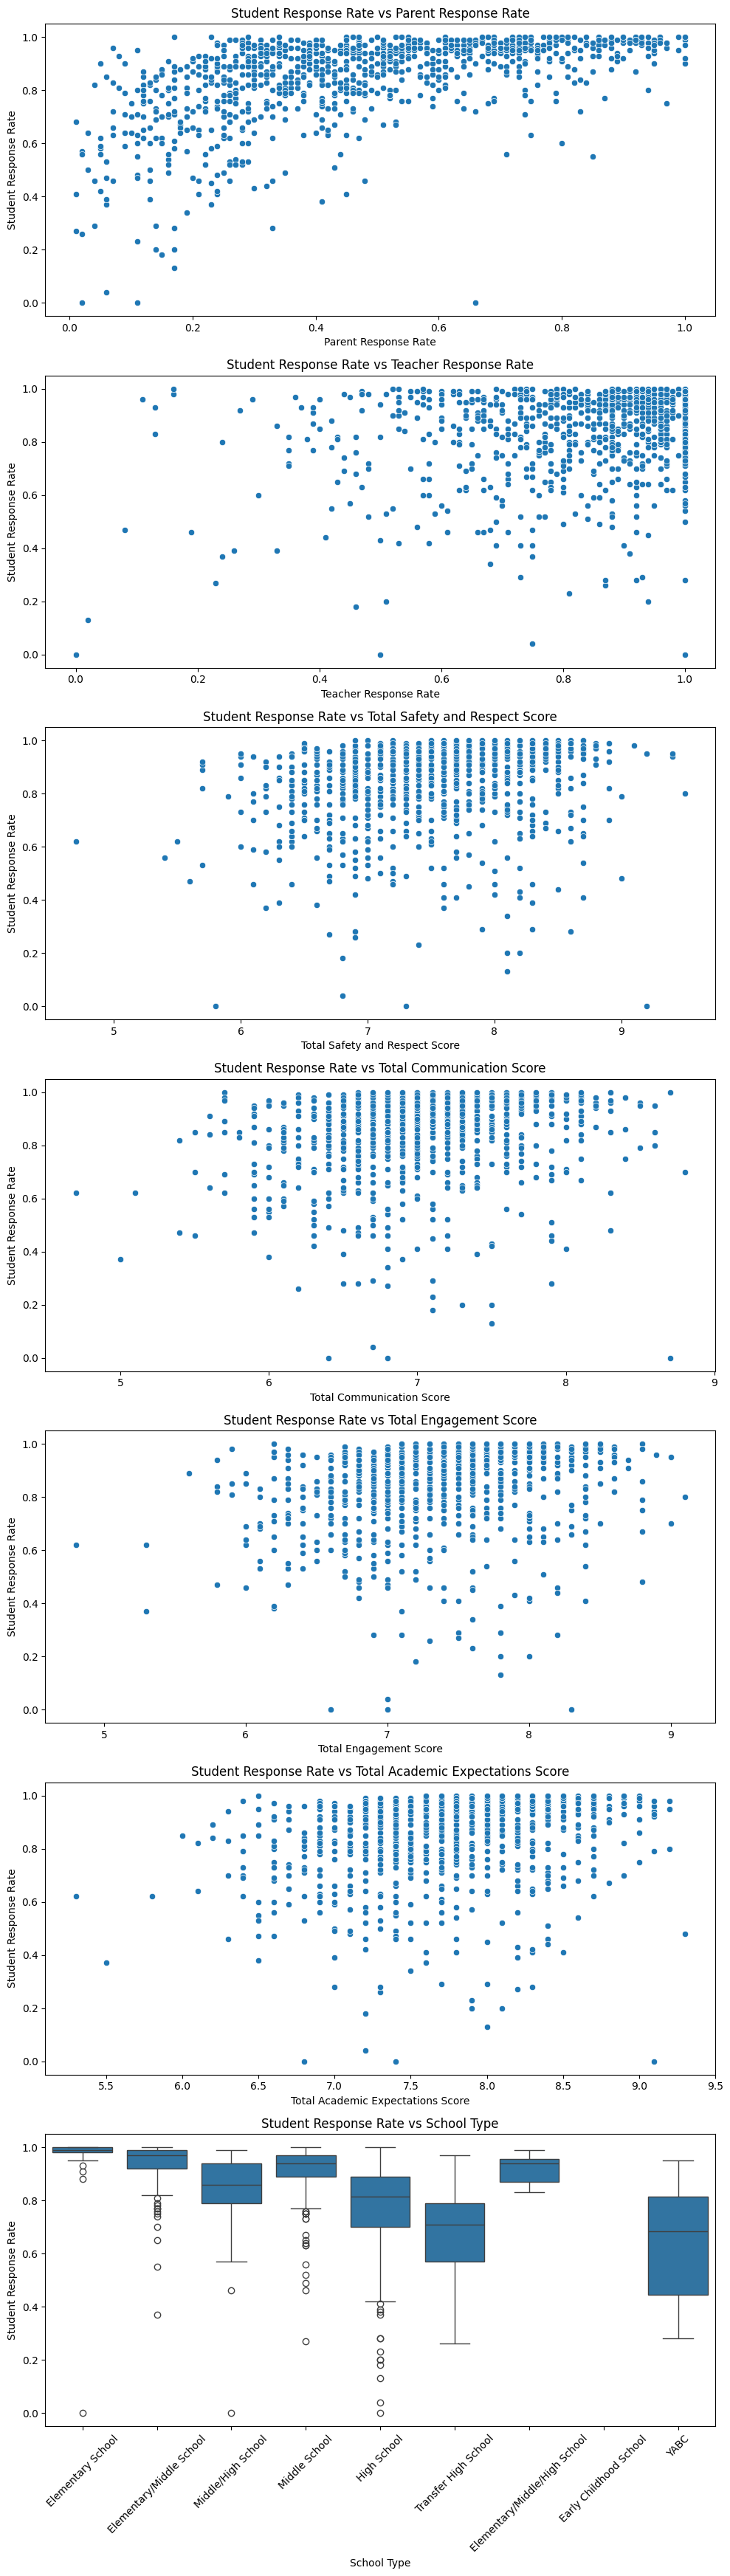

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# الأعمدة الأخرى
columns = [
    "Parent Response Rate",
    "Teacher Response Rate",
    "Total Safety and Respect Score",
    "Total Communication Score",
    "Total Engagement Score",
    "Total Academic Expectations Score",
    "School Type"  # هذا تصنيفي، بنعمله boxplot
]

# عدد الرسومات
n = len(columns)
fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n))

# حلقة لكل عمود
for i, col in enumerate(columns):
    ax = axes[i]
    
    if df_cleaned[col].dtype == 'object':
        # Boxplot إذا العمود تصنيفي مثل School Type
        sns.boxplot(data=df_cleaned, x=col, y="Student Response Rate", ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        # Scatter plot إذا العمود رقمي
        sns.scatterplot(data=df_cleaned, x=col, y="Student Response Rate", ax=ax)

    ax.set_title(f"Student Response Rate vs {col}")
    ax.set_ylabel("Student Response Rate")
    ax.set_xlabel(col)
    ax.grid(False)

plt.tight_layout()
plt.show()


في الرسومات الأولى (مثل العلاقة بين Student Response Rate و Parent Response Rate أو Teacher Response Rate)، نلاحظ أن هناك توزيع متنوع للبيانات، لكن لا يوجد علاقة واضحة أو قوية بين استجابة الطلاب وبقية العوامل.

كما أن معظم النقاط متجمعة عند قيم معينة مثل 0.8 إلى 1 في استجابة الطلاب، ما يعني أنه بشكل عام، الطلاب يجيبون في مستويات مرتفعة، بغض النظر عن القيم الأخرى.

Boxplot لـ School Type:

المدارس الصغيرة مثل "YABC" أو "Transfer High School" تظهر استجابة أقل مقارنة ببقية المدارس.

المدارس مثل "Elementary School" أو "Middle School" تظهر استجابة أعلى.

هذا يشير إلى أن نوع المدرسة يلعب دورًا كبيرًا في تحديد استجابة الطلاب.

اللي لاحظته هو أن نوع المدرسة هو العامل الأكثر وضوحًا في التأثير على معدل استجابة الطلاب، في حين أن العوامل الأخرى (مثل "Safety and Respect" أو "Teacher Response") ما أظهرت تأثيرات قوية أو طردية.










 عوامل منطقية بتأثر على استجابة الطالب:
شعور الطالب بالأمان والاحترام (Total Safety and Respect)
إذا الطالب حاسس إنو المدرسة آمنة ومحترمة، غالبًا بيكون مرتاح للمشاركة.

التواصل داخل المدرسة (Communication Score)
لو فيه تواصل فعّال، الطالب ممكن يحس إنو صوته مسموع، فبيرد على الاستبيانات.

مستوى التفاعل العام (Engagement Score)
لما يكون الطالب مشارك ومندمج، غالبًا ما بيتجاهل استبيانات التقييم.

توقعات أكاديمية واضحة (Academic Expectations)
لو المدرسة عندها توقعات واضحة، الطالب ممكن يحس بالمسؤولية ويشارك أكتر

In [12]:
df_cleaned.groupby("School Type")["Student Response Rate"].mean()

School Type
Early Childhood School                NaN
Elementary School                0.946429
Elementary/Middle School         0.937625
Elementary/Middle/High School    0.915714
High School                      0.774943
Middle School                    0.912414
Middle/High School               0.839655
Transfer High School             0.681020
YABC                             0.658636
Name: Student Response Rate, dtype: float64

In [13]:
# حفظ نسخة قبل التعبئة
df_cleaned["Student Response Rate Before"] = df_cleaned["Student Response Rate"].copy()


In [14]:
df_cleaned["Env_Avg"] = df_cleaned[[
    "Total Safety and Respect Score",
    "Total Communication Score",
    "Total Engagement Score",
    "Total Academic Expectations Score"
]].mean(axis=1)


0    7.875
1    8.125
Name: Env_Avg, dtype: float64


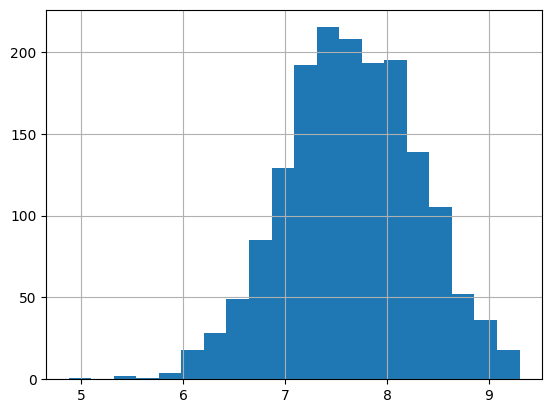

In [15]:
df_cleaned["Env_Avg"].hist(bins=20)  # عشان تشوفي الشكل العام
print(df_cleaned["Env_Avg"].mode())  # القيم الأكثر تكراراً


In [16]:
def categorize_env(avg):
    if avg >= 8.0:
        return  "excellent"
    elif avg >= 7.5:
        return "medium"
    else:
        return "poor"
df_cleaned["Env_Category"] = df_cleaned["Env_Avg"].apply(categorize_env)
df_cleaned["Env_Category"]


1       excellent
2       excellent
3       excellent
4            poor
5          medium
          ...    
1666    excellent
1667       medium
1668       medium
1669    excellent
1670         poor
Name: Env_Category, Length: 1670, dtype: object

In [17]:
grouped_means = df_cleaned.groupby(["School Type", "Env_Category"])["Student Response Rate"].mean()
grouped_means

School Type                    Env_Category
Early Childhood School         excellent            NaN
                               medium               NaN
                               poor                 NaN
Elementary School              excellent       0.880000
                               medium          0.993333
                               poor            0.985000
Elementary/Middle School       excellent       0.967250
                               medium          0.945741
                               poor            0.913030
Elementary/Middle/High School  medium          0.900000
                               poor            0.918333
High School                    excellent       0.892500
                               medium          0.824086
                               poor            0.743489
Middle School                  excellent       0.936727
                               medium          0.940000
                               poor            0.892025
Midd

نحسب متوسط البيئة لكل صف.🍀🍀🍀

نصنّف البيئة إلى 3 مستويات.

نستخدم (نوع المدرسة + تصنيف البيئة) لتعبئة القيم.

إذا فشل → نرجع لمتوسط نوع المدرسة فقط.

إذا فشل → نستخدم معدل الأهل والمعلمين.

إذا فشل → نعتمد على المتوسط العام.



In [18]:
import pandas as pd

# الأعمدة الرقمية
numeric_cols = [
    "Total Safety and Respect Score", 
    "Total Communication Score", 
    "Total Engagement Score", 
    "Total Academic Expectations Score", 
    "Student Response Rate",
    "Parent Response Rate",
    "Teacher Response Rate"
]

# تحويلها إلى float
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 1. نحسب المتوسط البيئي
df_cleaned["Env_Avg"] = df_cleaned[[
    "Total Safety and Respect Score",
    "Total Communication Score",
    "Total Engagement Score",
    "Total Academic Expectations Score"
]].mean(axis=1)

# 2. تصنيف البيئة
def categorize_env(avg):
    if avg >= 8.0:
        return "excellent"
    elif avg >= 7.5:
        return "medium"
    else:
        return "poor"

df_cleaned["Env_Category"] = df_cleaned["Env_Avg"].apply(categorize_env)

# 3. نحسب متوسط (نوع المدرسة + البيئة)
grouped_means = df_cleaned.groupby(["School Type", "Env_Category"])["Student Response Rate"].mean()

# 4. متوسط حسب نوع المدرسة فقط
school_means = df_cleaned.groupby("School Type")["Student Response Rate"].mean()

# 5. المتوسط العام
overall_mean = df_cleaned["Student Response Rate"].mean()

# 6. دالة التعبئة
def fill(row):
    if pd.isna(row["Student Response Rate"]):
        # المرحلة 1: نوع المدرسة + تصنيف البيئة
        val = grouped_means.get((row["School Type"], row["Env_Category"]))
        if pd.notna(val):
            return val
        # المرحلة 2: نوع المدرسة فقط
        val = school_means.get(row["School Type"])
        if pd.notna(val):
            return val
        # المرحلة 3: متوسط الأهل والمعلمين
        if pd.notna(row["Parent Response Rate"]) and pd.notna(row["Teacher Response Rate"]):
            return (row["Parent Response Rate"] + row["Teacher Response Rate"]) / 2
        # المرحلة 4: المتوسط العام
        return overall_mean
    else:
        return row["Student Response Rate"]

# 7. تطبيق التعبئة
df_cleaned["Student Response Rate"] = df_cleaned.apply(fill, axis=1)


In [19]:
df_cleaned["Student Response Rate"].isna().value_counts()

Student Response Rate
False    1670
Name: count, dtype: int64

In [20]:
df_cleaned["Student Response Rate"].unique()

array([0.88      , 0.96      , 0.99333333, 0.985     , 0.98      ,
       0.99      , 0.97      , 0.79      , 0.83      , 0.94      ,
       0.91      , 0.71      , 0.82      , 0.6       , 0.95      ,
       0.84      , 0.68      , 0.46      , 0.77      , 0.765     ,
       0.9       , 0.89      , 0.72      , 0.75      , 0.81      ,
       0.66      , 0.54      , 0.8       , 0.87      , 0.53      ,
       0.85      , 0.78      , 0.92      , 0.93      , 1.        ,
       0.04      , 0.74      , 0.48      , 0.41      , 0.76      ,
       0.62      , 0.34      , 0.49      , 0.29      , 0.7       ,
       0.73      , 0.38      , 0.59      , 0.37      , 0.55      ,
       0.86      , 0.28      , 0.56      , 0.815     , 0.63      ,
       0.67      , 0.65      , 0.27      , 0.43      , 0.69      ,
       0.47      , 0.61      , 0.64      , 0.        , 0.93672727,
       0.355     , 0.83      , 0.885     , 0.85      , 0.775     ,
       0.965     , 0.52      , 0.58      , 0.42      , 0.805  

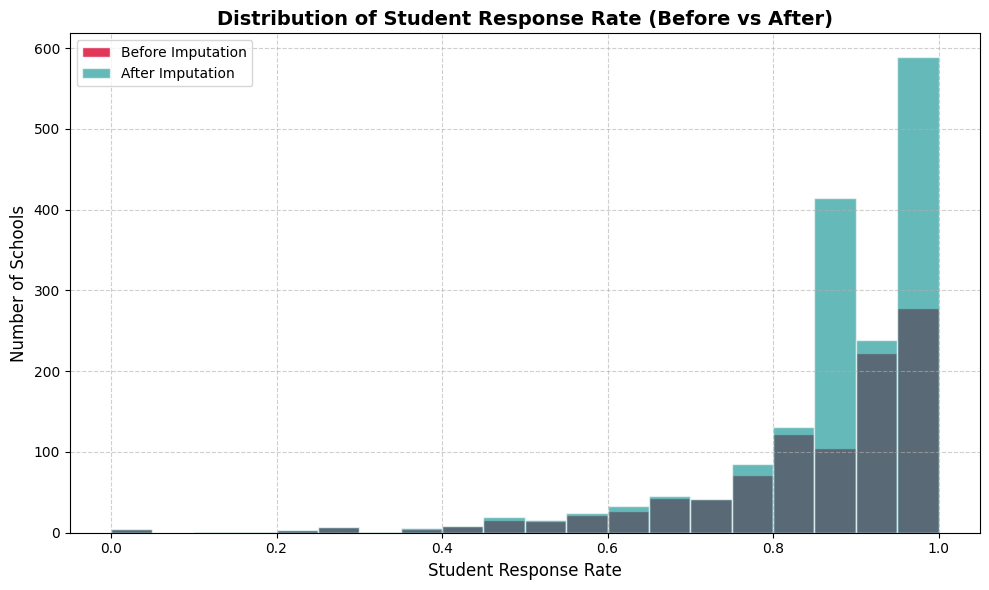

In [21]:
import matplotlib.pyplot as plt

# إنشاء الشكل
plt.figure(figsize=(10, 6), clear=True)

# Histogram قبل التعبئة
plt.hist(
    df_cleaned["Student Response Rate Before"].dropna(),
    bins=20,
    alpha=0.85,
    label="Before Imputation",
    color="crimson",             # لون أحمر غامق وواضح
    edgecolor='white'
)

# Histogram بعد التعبئة
plt.hist(
    df_cleaned["Student Response Rate"],
    bins=20,
    alpha=0.6,
    label="After Imputation",
    color="darkcyan",            # لون أزرق-أخضر أنيق
    edgecolor='white'
)

# تحسين الشكل العام
plt.title("Distribution of Student Response Rate (Before vs After)", fontsize=14, fontweight='bold')
plt.xlabel("Student Response Rate", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


انتهينا من القيم الفارغة والتنظيف الان سوف ننتقل لتحليل العلاقات والارتباطات بين الاعمدة😃

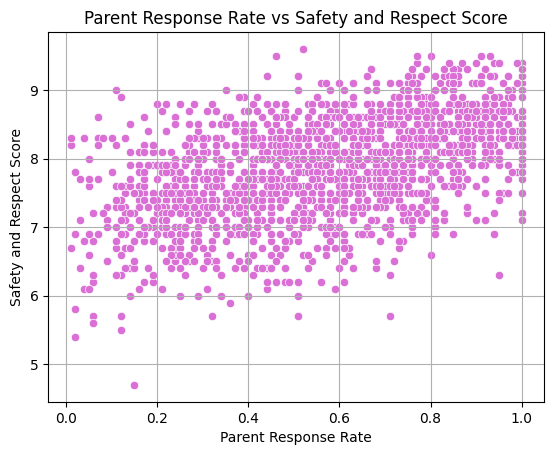

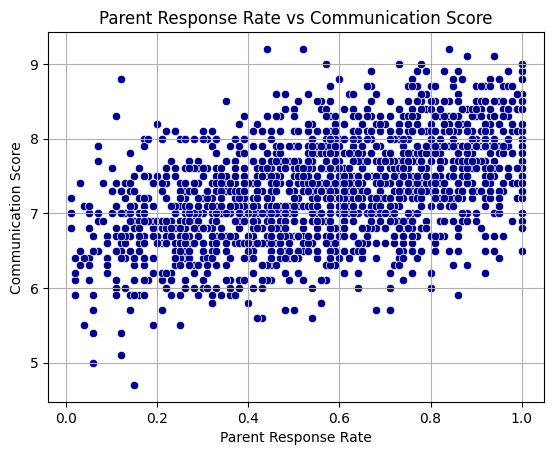

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# مثال 1: لون بنفسجي فاتح
sns.scatterplot(data=df_cleaned, x="Parent Response Rate", y="Total Safety and Respect Score", color="orchid")
plt.title("Parent Response Rate vs Safety and Respect Score", fontsize=12)
plt.xlabel("Parent Response Rate")
plt.ylabel("Safety and Respect Score")
plt.grid(True)
plt.show()

# مثال 2: لون أزرق غامق
sns.scatterplot(data=df_cleaned, x="Parent Response Rate", y="Total Communication Score", color="darkblue")
plt.title("Parent Response Rate vs Communication Score", fontsize=12)
plt.xlabel("Parent Response Rate")
plt.ylabel("Communication Score")
plt.grid(True)
plt.show()


In [23]:
# الارتباط بين استجابة الأهل ودرجة الأمان
corr1 = df_cleaned["Parent Response Rate"].corr(df_cleaned["Total Safety and Respect Score"])
print("Correlation with Safety and Respect Score:", corr1)

# الارتباط بين استجابة الأهل ودرجة التواصل
corr2 = df_cleaned["Parent Response Rate"].corr(df_cleaned["Total Communication Score"])
print("Correlation with Communication Score:", corr2)


Correlation with Safety and Respect Score: 0.4992279789664055
Correlation with Communication Score: 0.4767362218070806


 في علاقة ملحوظة، ولو إنها مش مثالية، لكنها مهمة ونقدر نستخدمها لتقدير أو توقع جودة المدرسة أو لتحسين استجابة الطلاب.
النتائج منطقية كمان: لما يكون في تفاعل من الأهل، البيئة بتكون غالبًا أكثر تواصلًا وأمانًا💕🥰.

تحليل: أي نوع مدارس عنده أعلى تقييم؟

In [24]:
# نحسب المتوسط لكل نوع مدرسة
df_cleaned.groupby("School Type")[[
    "Total Safety and Respect Score",
    "Total Communication Score",
    "Total Engagement Score",
    "Total Academic Expectations Score"
]].mean().sort_values(by="Total Academic Expectations Score", ascending=False)


,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
School Type,,,,
YABC,8.377273,7.700000,8.159091,8.368182
Early Childhood School,8.615663,8.004819,8.131325,8.360241
Elementary School,8.273906,7.645867,7.872609,8.051053
Transfer High School,8.091837,7.238776,7.775510,8.044898
Elementary/Middle School,7.661250,7.245625,7.536250,7.961250
Middle School,7.455290,7.067918,7.417406,7.807167
High School,7.394886,6.848864,7.157102,7.530966
Middle/High School,7.398851,6.847126,7.124138,7.514943
Elementary/Middle/High School,7.471429,6.857143,7.128571,7.514286


.أفضل نوع مدارس من حيث التقييم العام:
ي • :School Childhood Early 🥇كل المقاييس
 

• YABC 🥈ا

ا رغم أنهم غالب
مفاجأة! عندهم تقييمات مرتفعة جد
طلابهم عندهم تحديات.

أضعف نوع مدارس بالتقييم:
 وMiddle/High School و❌High School •
Elementary/Middle/High School:


___________________________________________________________________________________________________________________________

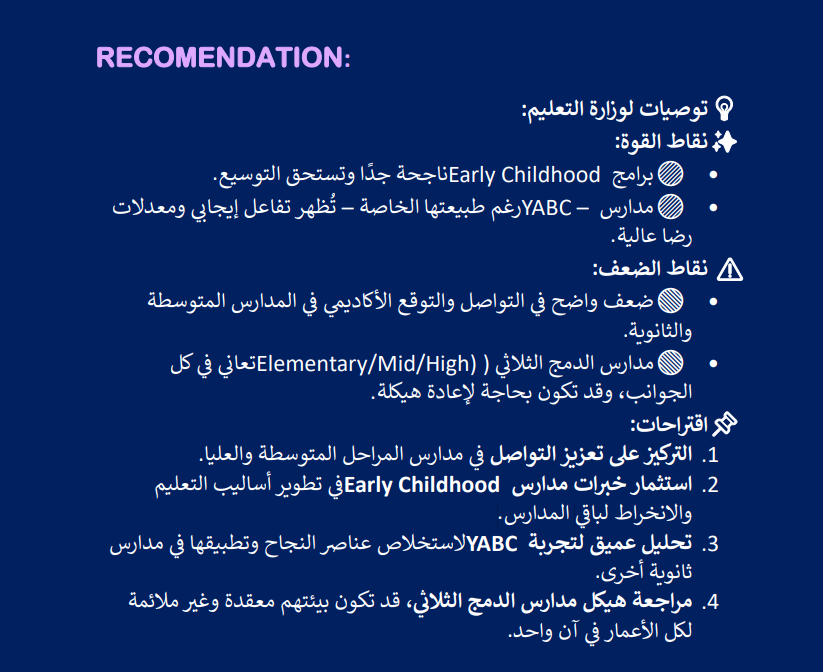

Go to the report for more informations__!!!😍

"________the______________________🤖_____________end________________"